In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.

In [32]:
a = pd.read_csv('./data/2016.csv',header=0)
b = pd.read_csv('./data/2016_2.csv', header=0)
c = pd.read_csv('./data/2017.csv', header=0)
d = pd.read_csv('./data/2018.csv', header=0)
# key atrs
important = ["IDE_EDA_ANO","IDE_SEX","DIAB_PAD_MAD","DIAB_HER","DIAB_HIJ",
"DIAB_OTROS","CVE_ACT_FIS","CVE_TAB","CVE_COMB_TUBER",
"CVE_COMB_CANCER","CVE_COMB_OBESIDAD","CVE_COMB_HIPER",
"CVE_COMB_VIH_SIDA","CVE_COMB_DEPRE","CVE_COMB_DISLI","CVE_COMB_CARDIO",
"CVE_COMB_HEPA","CVE_NUT","CVE_OFT",
"CVE_PIES","CVE_DIAB","CVE_TIPO_DISC_MOTO","CVE_TIPO_DISC_VISU",
"PESO","ESTATURA"]




# label

expected="CVE_DIAB"
# vertical join

result = pd.concat([a, b, c, d])

# hot encoding

result= result.replace("Masculino", 1)
result= result.replace("Femenino", 0)
result= result.replace("Si", 1)
result= result.replace("No", 0)
#result['CVE_DIAB'] = result['CVE_DIAB'].replace(0,2)
result["CVE_TAB"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_TAB"])  else 1,
                    axis=1)

result.fillna(0)
result["CVE_NUT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_NUT"])  else 1,
                    axis=1)

result["CVE_OFT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_OFT"])  else 1,
                    axis=1)

result["CVE_PIES"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_PIES"])  else 1,
                    axis=1)
result= result[important]



diab = result
print(diab.columns)

important.remove(expected)


   

Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


### Checking The Data

In [33]:
diab.isnull().sum()

IDE_EDA_ANO           0
IDE_SEX               0
DIAB_PAD_MAD          0
DIAB_HER              0
DIAB_HIJ              0
DIAB_OTROS            0
CVE_ACT_FIS           0
CVE_TAB               0
CVE_COMB_TUBER        0
CVE_COMB_CANCER       0
CVE_COMB_OBESIDAD     0
CVE_COMB_HIPER        0
CVE_COMB_VIH_SIDA     0
CVE_COMB_DEPRE        0
CVE_COMB_DISLI        0
CVE_COMB_CARDIO       0
CVE_COMB_HEPA         0
CVE_NUT               0
CVE_OFT               0
CVE_PIES              0
CVE_DIAB              0
CVE_TIPO_DISC_MOTO    0
CVE_TIPO_DISC_VISU    0
PESO                  0
ESTATURA              0
dtype: int64

The data looks clean. So we can start with the analysis.

### Basic EDA

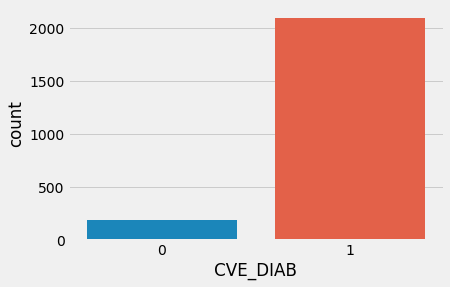

In [34]:
sns.countplot(x=expected,data=diab)
plt.show()

### Brief Analysis of the data

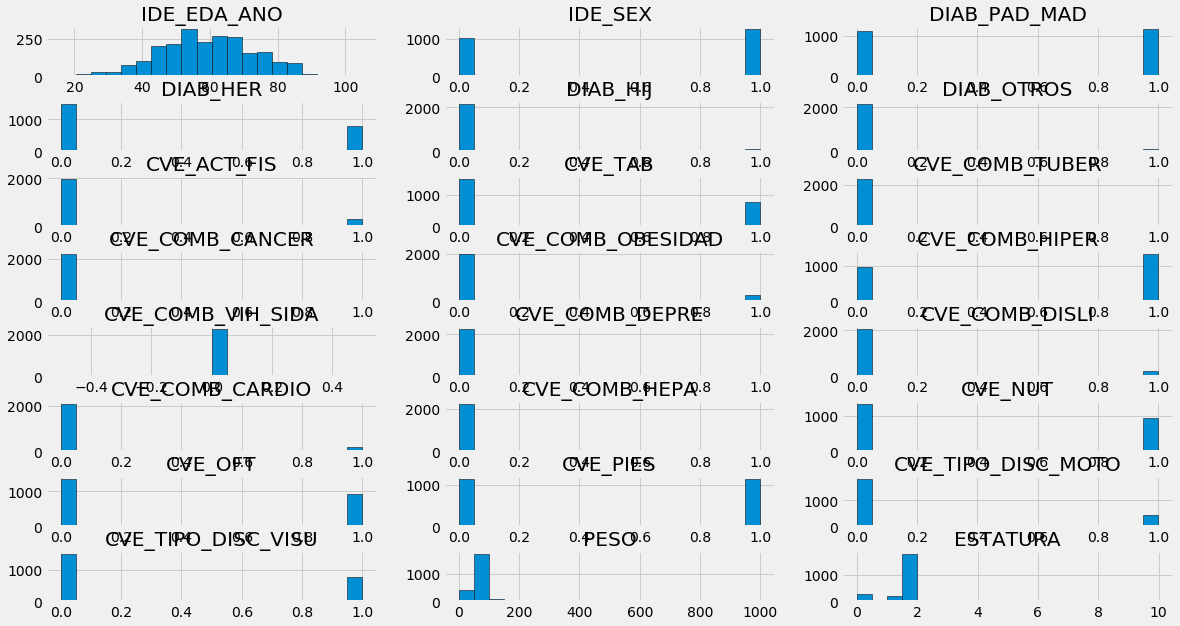

In [35]:
columns=important
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis Of Diabetic Cases

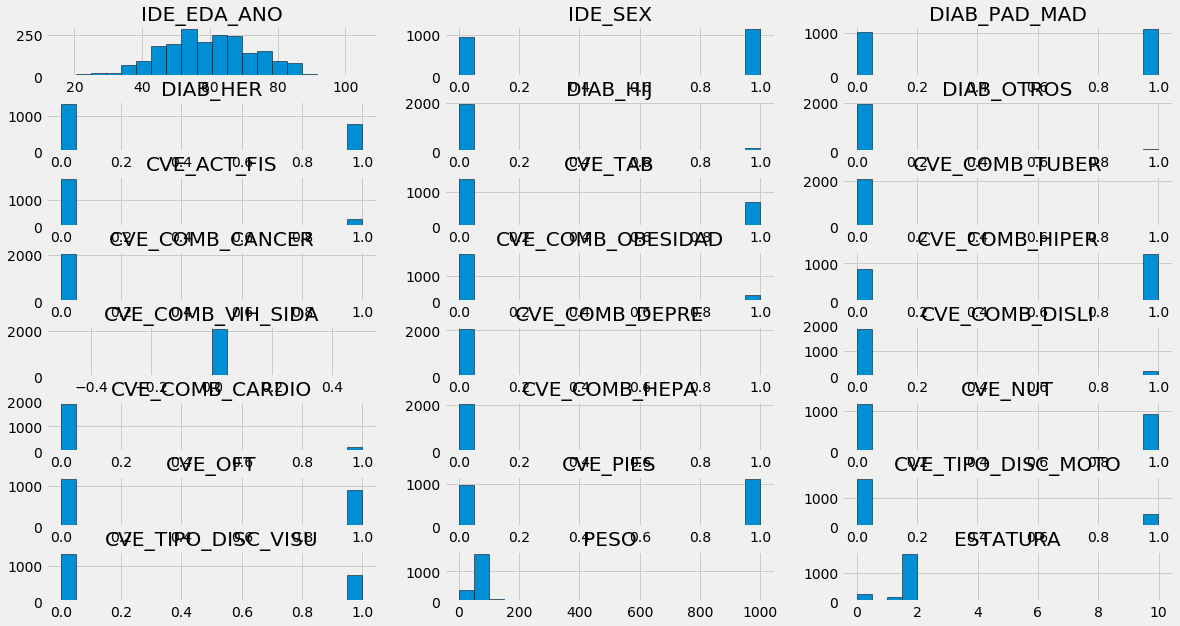

In [36]:
diab1=diab[diab[expected]==1]
columns=important
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### PairPlots:

Lets us see the distribution of the features in the dataset

In [37]:
#sns.pairplot(data=diab,hue=expected)
#plt.show()

### Observations:

1)The diagonal shows the distribution of the the dataset with the kernel density plots.

2)The scatter-plots shows the relation between each and every attribute or features taken pairwise.
Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.

### Let's Do Some Predictive Modeling

In [38]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Stratification:
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [39]:
outcome=diab[expected]
data=diab[important]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab[expected])# stratify the outcome
train_X=train[important]
test_X=test[important]
train_Y=train[expected]
test_Y=test[expected]

In [40]:
train_X.head(2)

,IDE_EDA_ANO,IDE_SEX,DIAB_PAD_MAD,DIAB_HER,DIAB_HIJ,DIAB_OTROS,CVE_ACT_FIS,CVE_TAB,CVE_COMB_TUBER,CVE_COMB_CANCER,...,CVE_COMB_DISLI,CVE_COMB_CARDIO,CVE_COMB_HEPA,CVE_NUT,CVE_OFT,CVE_PIES,CVE_TIPO_DISC_MOTO,CVE_TIPO_DISC_VISU,PESO,ESTATURA
678,56,1,1,1,0,0,0,1,0,0,...,0,0,0,1,1,1,0,1,56.0,1.55
7,53,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,630.0,1.70


In [41]:
train_Y.head(2)

678    1
7      1
Name: CVE_DIAB, dtype: int64

### SVM

In [42]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.9176882661996497
Accuracy for SVM kernel= linear is 0.9176882661996497


### Logistic Regression

In [43]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.9176882661996497


### Decision Tree

In [44]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))


The accuracy of the Decision Tree is 0.8581436077057794


### K-Nearest Neighbours

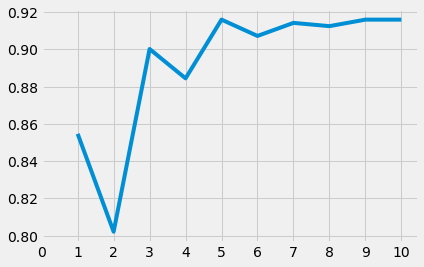

Accuracies for different values of n are: [0.85464098 0.80210158 0.90017513 0.88441331 0.91593695 0.90718039
 0.91418564 0.91243433 0.91593695 0.91593695]


In [45]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

### In a Nutshell

In [46]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
exportable={}



for i in range(len(models)):
    model=models[i]
    model.fit(train_X,train_Y)
    exportable[classifiers[i]]=model
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe



,Accuracy
Linear Svm,0.917688
Radial Svm,0.917688
Logistic Regression,0.917688
KNN,0.900175
Decision Tree,0.858144


In [49]:
for name, model in exportable.items():
    print(name, "->", model.predict(train_X.head(1)))
    
    try :
        
        print( "\t->",model.predict_proba(train_X.head(1)))
    except:
        pass
    
   
    



    

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
	-> [[0.0047201 0.9952799]]
KNN -> [1]
	-> [[0. 1.]]
Decision Tree -> [1]
	-> [[0. 1.]]


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:
1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

### Correlation Matrix

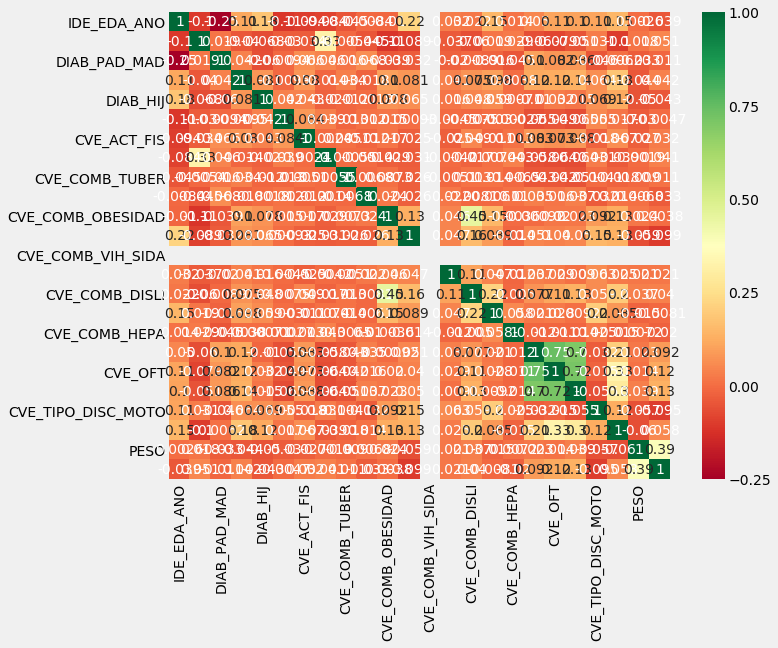

In [50]:
sns.heatmap(diab[important].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Observations:

1)All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

### Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[important]
Y=diab[expected]
model.fit(X,Y)
#pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

serie= pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
d=serie.to_dict()
serie


IDE_EDA_ANO           0.239019
PESO                  0.199133
ESTATURA              0.172647
CVE_PIES              0.038522
DIAB_PAD_MAD          0.036138
CVE_TAB               0.034914
IDE_SEX               0.034190
CVE_COMB_HIPER        0.033660
CVE_TIPO_DISC_VISU    0.024768
DIAB_HER              0.024485
CVE_TIPO_DISC_MOTO    0.020350
CVE_NUT               0.019867
CVE_COMB_OBESIDAD     0.019645
CVE_OFT               0.018554
CVE_COMB_CARDIO       0.017544
CVE_ACT_FIS           0.015581
DIAB_OTROS            0.013441
CVE_COMB_DISLI        0.010975
CVE_COMB_HEPA         0.009740
DIAB_HIJ              0.006411
CVE_COMB_CANCER       0.006056
CVE_COMB_DEPRE        0.003750
CVE_COMB_TUBER        0.000609
CVE_COMB_VIH_SIDA     0.000000
dtype: float64

### Observations:

1)The important features are: Glucose, BMI, Age, DiabetesPedigreeFunction

## Standardisation
There can be a lot of deviation in the given dataset. An example in the dataset can be the BMI where it has 248 unique values. This high variance has to be standardised. Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [81]:

sorted_d = sorted(d.items(), key=lambda kv: kv[1])[::-1]
print(sorted_d)

[('IDE_EDA_ANO', 0.2390192249950462), ('PESO', 0.19913283996598577), ('ESTATURA', 0.17264683180512752), ('CVE_PIES', 0.03852213994440167), ('DIAB_PAD_MAD', 0.036137889369730135), ('CVE_TAB', 0.03491425290645026), ('IDE_SEX', 0.03419030672767708), ('CVE_COMB_HIPER', 0.033659571626369955), ('CVE_TIPO_DISC_VISU', 0.02476812414865507), ('DIAB_HER', 0.024484978437154435), ('CVE_TIPO_DISC_MOTO', 0.02034977626101252), ('CVE_NUT', 0.019867431005293406), ('CVE_COMB_OBESIDAD', 0.01964458197805087), ('CVE_OFT', 0.01855449366503743), ('CVE_COMB_CARDIO', 0.017544268436299203), ('CVE_ACT_FIS', 0.015580975736108846), ('DIAB_OTROS', 0.013440582391207481), ('CVE_COMB_DISLI', 0.01097514617764322), ('CVE_COMB_HEPA', 0.009740120340850556), ('DIAB_HIJ', 0.006410962745671237), ('CVE_COMB_CANCER', 0.0060559028813235724), ('CVE_COMB_DEPRE', 0.0037502062848111728), ('CVE_COMB_TUBER', 0.0006093921700924573), ('CVE_COMB_VIH_SIDA', 0.0)]


### Using Only Important Features And Standardisation

In [82]:

import copy
argc= 3
weighted=[]
for i in range(3):
    weighted.append(sorted_d[i][0])

cut=copy.deepcopy(weighted)
cut.append(expected)

print(cut)

print(weighted)

print(diab.columns)


['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB']
['IDE_EDA_ANO', 'PESO', 'ESTATURA']
Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


In [84]:






diab2=diab[cut]
print(diab2.columns)


Index(['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB'], dtype='object')


In [89]:
from sklearn.preprocessing import StandardScaler #Standardisation
features=diab2[weighted]
scaler=StandardScaler()
features_standard=scaler.fit_transform(features)# Gaussian Standardisation
##########



###########
x=pd.DataFrame(features_standard,columns=[weighted])


,IDE_EDA_ANO,PESO,ESTATURA
0,-0.149397,-0.085093,0.274335
1,0.702062,-0.167048,0.165991
2,1.127791,-0.167048,0.301421
3,-0.149397,-0.103305,0.220163
4,-1.568494,-0.030456,0.396222
5,-0.362261,-0.258109,0.220163
6,-1.142764,-0.223506,0.247249
7,0.134423,-0.116964,0.044104
8,0.418242,0.379320,0.084733
9,0.560152,-0.258109,0.220163


In [94]:
x[expected] = diab2[expected].values

In [97]:
outcome=x[expected]
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x[expected])
train_X1=train1[weighted]
test_X1=test1[weighted]
train_Y1=train1[expected]
test_Y1=test1[expected]

In [101]:
dict_models={}
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]


for i in range(len(models)):
    model = models[i]
    model.fit(train_X1,train_Y1)
    dict_models[classifiers[i]]= model
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy'] 



In [104]:

#scaled_instances = scaler.transform(raw_instances)


for name, model in dict_models.items():
    print(name, "->", model.predict(train_X1.head(1)))
    try:  
        print("\t\t->",model.predict_proba(train_X1.head(1)))
    except:
        pass

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
		-> [[0.08571691 0.91428309]]
KNN -> [1]
		-> [[0. 1.]]
Decision Tree -> [1]
		-> [[0. 1.]]


In [105]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.917688,0.917688,0.000000
Radial Svm,0.917688,0.917688,0.000000
Logistic Regression,0.917688,0.917688,0.000000
KNN,0.910683,0.900175,0.010508
Decision Tree,0.859895,0.858144,0.001751


The above dataframe shows the new accuracy of the models after feature selection. 
We can see that the Accuarcy for linear Svm increases by 1% whereas it increases about 12% for Radial Svm.
For LR the accuracy decreases

## Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [106]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

In [107]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [108]:
cross_d={}
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]



for i in range(len(models)):
    model = models[i]
    cv_result = cross_val_score(model,x[weighted],x[expected], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    cross_d[classifiers[i]]=model
    
    
    
new_models_dataframe2=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.917688
Radial Svm,0.917688
Logistic Regression,0.917688
KNN,0.910683
Decision Tree,0.859895


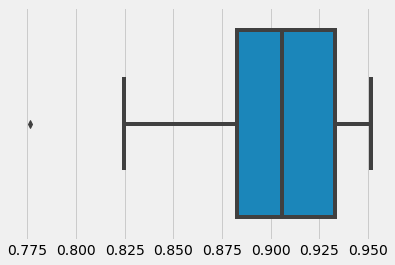

In [109]:
box=pd.DataFrame(accuracy,index=[classifiers])
sns.boxplot(box.T)
plt.show()

The above boxplot shows that SVM and LR perform the best while Decision Tree performs the worst.

## Ensembling

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. The models used to create such ensemble models are called ‘**base models**’. 

We will do ensembling with the **Voting Ensemble.**
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

We will be using weighted Voting Classifier. We will assign to the classifiers according to their accuracies. So the classifier with single accuracy will be assigned the highest weight and so on.

In our case, we will use the Top 3 classifiers i.e Linaer SVM, Radial(rbf) SVM and Logistic Regression classifiers.


In [110]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [111]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

### Linear and Radial SVM

In [112]:
ensemble_lin_rbf=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Radial_svm', radial_svm)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear and Radial SVM is:',ensemble_lin_rbf.score(test_X1,test_Y1))

The accuracy for Linear and Radial SVM is: 0.9176882661996497


### Linear SVM with Logistic Regression

In [113]:
ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.9176882661996497


### Logistic Regression with Radial SVM

In [114]:
ensemble_rad_lr=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                       voting='soft', weights=[1,2]).fit(train_X1,train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is:',ensemble_rad_lr.score(test_X1,test_Y1))

The accuracy for Radial SVM and Logistic Regression is: 0.9176882661996497


### All 3 classifiers combined

In [115]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.9176882661996497


So the maximum Accuracy which we could get by using ensemble models  is 78.125%.

I would like you all for having a look at this notebook.

Please Upvote if Useful